# Game of Life

In [55]:
import matplotlib
matplotlib.use("Agg")
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import random
class Game(object):
    
    def __init__(self, state):
        self.state = state

    def step(self, count = 1):
        for generation in range(count):
            new_board = [[False] * self.state.width for row in range(self.state.height)]

            for y, row in enumerate(self.state.board):
                for x, cell in enumerate(row):
                    neighbours = self.neighbours(x, y)
                    previous_state = self.state.board[y][x]
                    should_live = neighbours == 3 or (neighbours == 2 and previous_state == True)
                    new_board[y][x] = should_live

            self.state.board = new_board

    def neighbours(self, x, y):
        count = 0
        for hor in [x-1, x, x+1]:
            for ver in [y-1, y, y+1]:
                if (hor != x or ver != y) and (0 <= hor < self.state.width and 0 <= ver < self.state.height):
                    count += self.state.board[ver][hor]
        return count

    def display(self):
        return self.state.board

class State(object):
    
    def __init__(self, width, height, board = None):
        if not board:
            self.board = [[random.getrandbits(1) for x in range(width)] for y in range(height)]
        self.width = width
        self.height = height

/Users/jgzuke/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


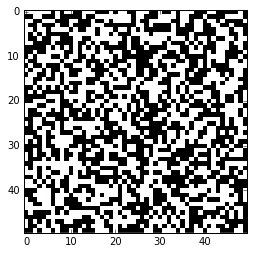

In [63]:
my_game = Game(State(width = 50, height = 50))
plt.imshow(my_game.display(), cmap='gray', interpolation='none')

In [68]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=3, metadata=dict(artist='Me'), bitrate=360)
num_frames = 100

In [ ]:
my_game = Game(State(width = 100, height = 100))
fig = plt.figure()

def update_board(i):
    my_game.step()
    return plt.imshow(my_game.display(), cmap='gray', interpolation='none'),

life_1 = animation.FuncAnimation(fig, update_board, num_frames, interval=50, blit=True)
life_1.save('life1.mp4', writer=writer)

In [ ]:
my_game = Game(State(width = 100, height = 100))
fig2 = plt.figure()

frames = []
for i in range(num_frames):
    my_game.step()
    frames.append((plt.imshow(my_game.display(), cmap='gray', interpolation='none'),))

life_2 = animation.ArtistAnimation(fig2, frames, interval=50, blit=True)
life_2.save('life2.mp4', writer=writer)